In [2]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib import ticker, cm
import numpy as np
from numpy import ma
import csv

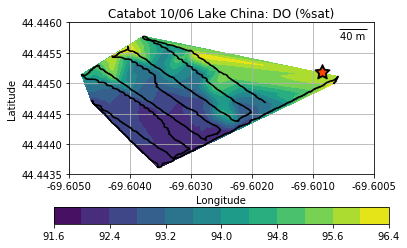

In [34]:
degree_sign= u'\N{DEGREE SIGN}'

CSV_FILE_PATH = '../../../Data/ISER2021/China-catabot-20201006.csv'
#CSV_FILE_PATH2 = '../../../Data/ISER2021/Sunapee-20200715-path-2.csv'
#CSV_FILE_PATH3 = '../../../Data/ISER2021/Sunapee-20200715-path-3.csv'

with open(CSV_FILE_PATH, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path1_list = np.array(list(reader))
    
"""    
with open(CSV_FILE_PATH2, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path2_list = np.array(list(reader))
    
with open(CSV_FILE_PATH3, 'r') as csv_file:
    reader = csv.reader(csv_file)
    path3_list = np.array(list(reader))
"""
#=============================== 07/15 ===============================

# one independent
# temp
#z = path1_list[0:2413,23]
#z = z.astype('float32')

# DO
z = path1_list[0:2413,30]
z = z.astype('float32')

# gps x,y
x = path1_list[0:2413,2]
x = x.astype('float32')
y = path1_list[0:2413,1]
y = y.astype('float32')

"""

# PATH 1
# temp
z1 = path1_list[0:2126,23]
z1 = z1.astype('float32')

# gps x,y
x1 = path1_list[0:2126,2]
x1 = x1.astype('float32')
y1 = path1_list[0:2126,1]
y1 = y1.astype('float32')

## PATH 2
# temp
z2 = path2_list[0:998,23]
z2 = z2.astype('float32')

# gps x,y
x2 = path2_list[0:998,2]
x2 = x2.astype('float32')
y2 = path2_list[0:998,1]
y2 = y2.astype('float32')

## PATH 3
# temp
z3 = path3_list[0:597,23]
z3 = z3.astype('float32')

# gps x,y
x3 = path3_list[0:597,2]
x3 = x3.astype('float32')
y3 = path3_list[0:597,1]
y3 = y3.astype('float32')

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
z = np.concatenate([z1, z2, z3])
"""
#=====================================================================

f, ax = plt.subplots()
#ax.set_title('Catabot 07/15 Sunapee path 1: Temperature (' + degree_sign + 'C)')
ax.set_title('Catabot 10/06 Lake China: DO (%sat)')

cs = ax.tricontourf(x,y,z, 10, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03))
#cs = ax.tricontourf(x,y,z, 20, vmin=24.35, vmax=26.94)
#cs = ax.tricontourf(x,y,z, 20)

f.colorbar(cs, orientation='horizontal', format='%.1f')

ax.set_xlabel('Longitude')
plt.xlim([-69.6050, -69.6005])
ax.set_xticks(np.arange(-69.6050, -69.6000, 0.001))
f.canvas.draw()
ax.set_xticklabels(['-69.6050', '-69.6040', '-69.6030', '-69.6020', '-69.6010', '-69.6005'])

ax.set_ylabel('Latitude')
plt.ylim([44.4435, 44.4460])
ax.set_yticks(np.arange(44.4435, 44.4461, 0.0005))
f.canvas.draw()
ax.set_yticklabels(['44.4435', '44.4440', '44.4445', '44.4450', '44.4455', '44.4460'])

# path 1,2,3
ax.plot(x,y,marker='o', color='k', markersize=0.1)
#ax.plot(x2,y2,marker='o', color='b', markersize=0.1)
#ax.plot(x3,y3,marker='o', color='r', markersize=0.1)

ax.set_aspect('equal')
plt.grid(True)

# boathouse
ax.plot(np.array([-69.6008402]), np.array([44.4451898]), color='k', marker=(5,1), markersize=16)
ax.plot(np.array([-69.6008402]), np.array([44.4451898]), color='#FF4500', marker=(5,1), markersize=8)


"""
# summer buoy
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.033128]), np.array([43.4096079]), color='yellow', marker='o', markersize=8)

# winter buoy
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='k', marker='o', markersize=13)
ax.plot(np.array([-72.0365116]), np.array([43.410345]), color='m', marker='o', markersize=8)
"""

bar = AnchoredSizeBar(ax.transData, 0.00046, '40 m', 'upper right', pad=0.6, frameon=False)
ax.add_artist(bar)


plt.show()
f.savefig('1006-China-DO.pdf', bbox_inches ='tight')